In [4]:
# pip install polygon_geohasher

In [23]:
from polygon_geohasher.polygon_geohasher import geohash_to_polygon
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

geohashes = pd.read_csv('/Users/jpg23/data/downtownrecovery/seattle/seattle_6digit_geohashes.csv')

geo_list = geohashes['geohashid'].tolist()
geo_list[:5]

['c22yj7', 'c22yjk', 'c22yjm', 'c22yjq', 'c22yjr']

In [19]:
# Convert each geohash to a polygon and store in a list
polygons = [geohash_to_polygon(gh) for gh in geo_list]

geo_poly = [{'geohash_id': gh, 'geometry': geohash_to_polygon(gh)} for gh in geo_list]

In [26]:
# Create a GeoDataFrame from the list of polygons
gdf = gpd.GeoDataFrame(geo_poly).set_crs(4326)

In [27]:
gdf

,geohash_id,geometry
0,c22yj7,"POLYGON ((-122.4646 47.47742, -122.45361 47.47..."
1,c22yjk,"POLYGON ((-122.4646 47.48291, -122.45361 47.48..."
2,c22yjm,"POLYGON ((-122.4646 47.4884, -122.45361 47.488..."
3,c22yjq,"POLYGON ((-122.4646 47.4939, -122.45361 47.493..."
4,c22yjr,"POLYGON ((-122.4646 47.49939, -122.45361 47.49..."
...,...,...
1099,c23p6y,"POLYGON ((-122.2229 47.71362, -122.21191 47.71..."
1100,c23p6z,"POLYGON ((-122.2229 47.71912, -122.21191 47.71..."
1101,c23pdb,"POLYGON ((-122.2229 47.72461, -122.21191 47.72..."
1102,c23pdc,"POLYGON ((-122.2229 47.7301, -122.21191 47.730..."


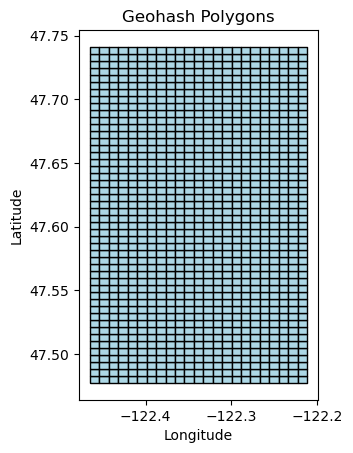

In [28]:
gdf.plot(edgecolor="black", facecolor="lightblue")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geohash Polygons")
plt.show()

In [29]:
gdf.to_file('/Users/jpg23/data/downtownrecovery/seattle/seattle_6digit_geohashes.geojson', driver = 'GeoJSON')